In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
import  matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact


# Modeling & Accuracy Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/data.csv'
df = pd.read_csv(path)

In [4]:
df.shape

(2200, 8)

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Fill-NA function is used to replace missing values with statistical values such as mean , median and mode. In this case it isn't required.

In [7]:
df.value_counts().sum()

2200

In [8]:
df['label'].value_counts()

papaya         100
coffee         100
apple          100
banana         100
grapes         100
lentil         100
cotton         100
mothbeans      100
mungbean       100
orange         100
coconut        100
pomegranate    100
jute           100
blackgram      100
rice           100
watermelon     100
muskmelon      100
chickpea       100
mango          100
maize          100
kidneybeans    100
pigeonpeas     100
Name: label, dtype: int64

In [9]:
print("N AVG: {0:.2f}".format(df['N'].mean()))
print("P AVG: {0:.2f}".format(df['P'].mean()))
print("K AVG: {0:.2f}".format(df['K'].mean()))
print("Temperature celcius AVG: {0:.2f}".format(df['temperature'].mean()))
print("Humidity% AVG: {0:.2f}".format(df['humidity'].mean()))
print("pH AVG: {0:.2f}".format(df['ph'].mean()))
print("Rainfall mm AVG: {0:.2f}".format(df['rainfall'].mean()))

N AVG: 50.55
P AVG: 53.36
K AVG: 48.15
Temperature celcius AVG: 25.62
Humidity% AVG: 71.48
pH AVG: 6.47
Rainfall mm AVG: 103.46


In [10]:
@interact
def summary(crops=list(df['label'].value_counts().index)):
  x=df[df['label']==crops]
  print(".........................")
  print("stats for nitrogen")
  print("min nitrogen required:",x['N'].min())
  print("mean nitrogen required:",x['N'].mean())
  print("max nitrogen required:",x['N'].max())

  print(".........................")
  print("stats for Phosphorous")
  print("min Phosphorous required:",x['P'].min())
  print("mean Phosphorous required:",x['P'].mean())
  print("max Phosphorous required:",x['P'].max())

  print(".........................")
  print("stats for Potassium")
  print("min Potassium required:",x['K'].min())
  print("mean Potassium required:",x['K'].mean())
  print("max Potassium required:",x['K'].max())

  print(".........................")
  print("stats for temperature")
  print("min temperature required:",x['temperature'].min())
  print("mean temperature required:",x['temperature'].mean())
  print("max temperature required:",x['temperature'].max())

  print(".........................")
  print("stats for humidity")
  print("min humidity required:",x['humidity'].min())
  print("mean humidity required:",x['humidity'].mean())
  print("max humidity required:",x['humidity'].max())

  print(".........................")
  print("stats for pH")
  print("min pH required:",x['ph'].min())
  print("mean pH required:",x['ph'].mean())
  print("max pH required:",x['ph'].max())

  print(".........................")
  print("stats for rainfall")
  print("min rainfall required:",x['rainfall'].min())
  print("mean rainfall required:",x['rainfall'].mean())
  print("max rainfall required:",x['rainfall'].max())

interactive(children=(Dropdown(description='crops', options=('papaya', 'coffee', 'apple', 'banana', 'grapes', …

In [11]:
@interact
def compare(conditions=['N','P','K','temperature','humidity','ph','rainfall']):
  print("Average value of",conditions,"is {0:.2f}".format(df[conditions].mean()))
  print("...............................................")
  print("cotton: {0:.2f}".format(df[(df['label']=='cotton')][conditions].mean()))
  print("banana: {0:.2f}".format(df[(df['label']=='banana')][conditions].mean()))
  print("chickpea: {0:.2f}".format(df[(df['label']=='chickpea')][conditions].mean()))
  print("papaya: {0:.2f}".format(df[(df['label']=='papaya')][conditions].mean()))
  print("lentil: {0:.2f}".format(df[(df['label']=='lentil')][conditions].mean()))
  print("maize: {0:.2f}".format(df[(df['label']=='maize')][conditions].mean()))
  print("jute: {0:.2f}".format(df[(df['label']=='jute')][conditions].mean()))
  print("pigeonpeas: {0:.2f}".format(df[(df['label']=='pigeonpeas')][conditions].mean()))
  print("coconut: {0:.2f}".format(df[(df['label']=='coconut')][conditions].mean()))
  print("apple: {0:.2f}".format(df[(df['label']=='apple')][conditions].mean()))
  print("watermelon: {0:.2f}".format(df[(df['label']=='watermelon')][conditions].mean()))
  print("grapes: {0:.2f}".format(df[(df['label']=='grapes')][conditions].mean()))
  print("muskmelon: {0:.2f}".format(df[(df['label']=='muskmelon')][conditions].mean()))
  print("blackgram: {0:.2f}".format(df[(df['label']=='blackgram')][conditions].mean()))
  print("coffee: {0:.2f}".format(df[(df['label']=='coffee')][conditions].mean()))
  print("mango: {0:.2f}".format(df[(df['label']=='mango')][conditions].mean()))
  print("rice: {0:.2f}".format(df[(df['label']=='rice')][conditions].mean()))
  print("orange: {0:.2f}".format(df[(df['label']=='orange')][conditions].mean()))
  print("pomegranate: {0:.2f}".format(df[(df['label']=='pomegranate')][conditions].mean()))
  print("kidneybeans: {0:.2f}".format(df[(df['label']=='kidneybeans')][conditions].mean()))
  print("mungbean: {0:.2f}".format(df[(df['label']=='mungbean')][conditions].mean()))
  print("mothbeans: {0:.2f}".format(df[(df['label']=='mothbeans')][conditions].mean()))       

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [16]:
@interact
def compare(conditions=['N','P','K','temperature','humidity','ph','rainfall']):
  print("crops which require greater than avg",conditions,'\n')
  print(df[df[conditions]>df[conditions].mean()]['label'].unique())
  print("............................................")
  print("crops which require less than average",conditions,'\n')
  print(df[df[conditions]<df[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

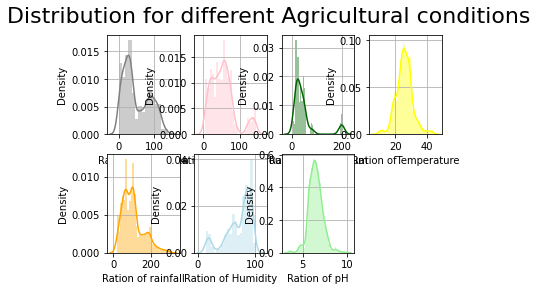

In [33]:
plt.subplot(2,4,1)
sns.distplot(df['N'],color='grey')
plt.xlabel('Ration of Nitrogen',fontsize=10)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df['P'],color='pink')
plt.xlabel('Ration of Phosphorous',fontsize=10)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df['K'],color='darkgreen')
plt.xlabel('Ration of Potassium',fontsize=10)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(df['temperature'],color='yellow')
plt.xlabel('Ration ofTemperature',fontsize=10)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(df['rainfall'],color='orange')
plt.xlabel('Ration of rainfall',fontsize=10)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(df['humidity'],color='lightblue')
plt.xlabel('Ration of Humidity',fontsize=10)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(df['ph'],color='lightgreen')
plt.xlabel('Ration of pH',fontsize=10)
plt.grid()

plt.suptitle('Distribution for different Agricultural conditions',fontsize=22)
plt.show()

In [36]:
print("some of the outliers")
print("                    ")
print("crops which require very high nitrogen:",df[df['N']>120]['label'].unique())
print("crops which require very high phosphorous:",df[df['P']>100]['label'].unique())
print("crops which require very high potassium:",df[df['K']>200]['label'].unique())
print("crops which require very high rainfall:",df[df['rainfall']>200]['label'].unique())
print("crops which require very high temperature:",df[df['temperature']>40]['label'].unique())
print("crops which require very low temperature:",df[df['temperature']<10]['label'].unique())
print("crops which require very high pH:",df[df['ph']>9]['label'].unique())
print("crops which require very low pH:",df[df['ph']<4]['label'].unique())

some of the outliers
                    
crops which require very high nitrogen: ['cotton']
crops which require very high phosphorous: ['grapes' 'apple']
crops which require very high potassium: ['grapes' 'apple']
crops which require very high rainfall: ['rice' 'papaya' 'coconut']
crops which require very high temperature: ['grapes' 'papaya']
crops which require very low temperature: ['grapes']
crops which require very high pH: ['mothbeans']
crops which require very low pH: ['mothbeans']


In [37]:
print("summer crops")
print(df[(df['temperature']>30)&(df['humidity']>50)]['label'].unique())
print("                            ")
print("rainy crops")
print(df[(df['temperature']<20)&(df['humidity']>30)]['label'].unique())
print("                            ")
print("winter crops")
print(df[(df['rainfall']>200)&(df['humidity']>30)]['label'].unique())

summer crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
                            
rainy crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
                            
winter crops
['rice' 'papaya' 'coconut']


clusterring analysis


In [40]:
from sklearn.cluster import KMeans

#removing the labels column
x=df.drop(['label'],axis=1)

x=x.values

#checking the shape
print(x.shape)

(2200, 7)


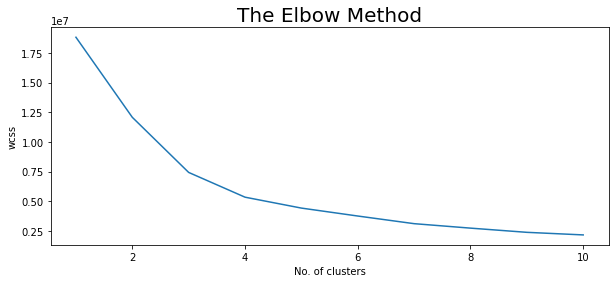

In [41]:
#determining optimal number of clusters within the dataset with elbow method

plt.rcParams['figure.figsize']=(10,4)

wcss = []
for i in range(1,11):
  km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  km.fit(x)
  wcss.append(km.inertia_)

#plotting the results 
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

### #We can see two elbows 3 and 4. In such cases we generally take the second one.Hence, we'll proceed with 4. 

In [45]:
#Lets implement the K Means algorithm to perform Clustering analysis

km = KMeans (n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

# Lets find out the Results
a = df['label']
y_means = pd.DataFrame (y_means)
z = pd.concat([y_means, a], axis = 1)
z = z. rename (columns = {0: 'cluster'})

# Lets check the Clusters of each Crops
print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("_______________________________________________________________")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("_______________________________________________________________")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("_______________________________________________________________")
print("Crops in Forth Cluster:", z[z['cluster'] == 3]['label'].unique())

Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
_______________________________________________________________
Crops in Second Cluster: ['grapes' 'apple']
_______________________________________________________________
Crops in Third Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
_______________________________________________________________
Crops in Forth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [47]:
#Splitting

y=df['label']
x=df.drop(['label'],axis=1)

print("Shape of x:",x.shape)
print("Shape of y:",y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [48]:
#training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

print("Shape of x_train:",x_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (1760, 7)
Shape of y_train: (1760,)
Shape of x_test: (440, 7)
Shape of y_test: (440,)


In [51]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


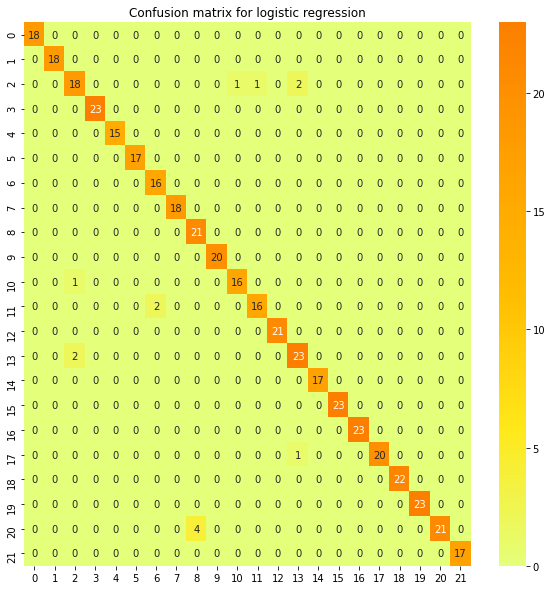

In [52]:
#Model Performance
from sklearn.metrics import confusion_matrix

#plotting thr confusion matrix first
plt.rcParams['figure.figsize']=(10,10)
c=confusion_matrix(y_test,y_predicted)
sns.heatmap(c,annot=True,cmap='Wistia')
plt.title('Confusion matrix for logistic regression',fontsize=12)
plt.show()

In [53]:
#classification report
cr=classification_report(y_test,y_predicted)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [54]:
#Just a cross check with the main dataframe.
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [55]:
prediction=model.predict((np.array([[90,40,40,20,80,7,200]])))
print("For given condition the suggested crop is: ",prediction)

For given condition the suggested crop is:  ['rice']
